In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
df.isna().mean()*100


Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [5]:
num_cols = df.select_dtypes(exclude= 'O').columns
num_cols

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

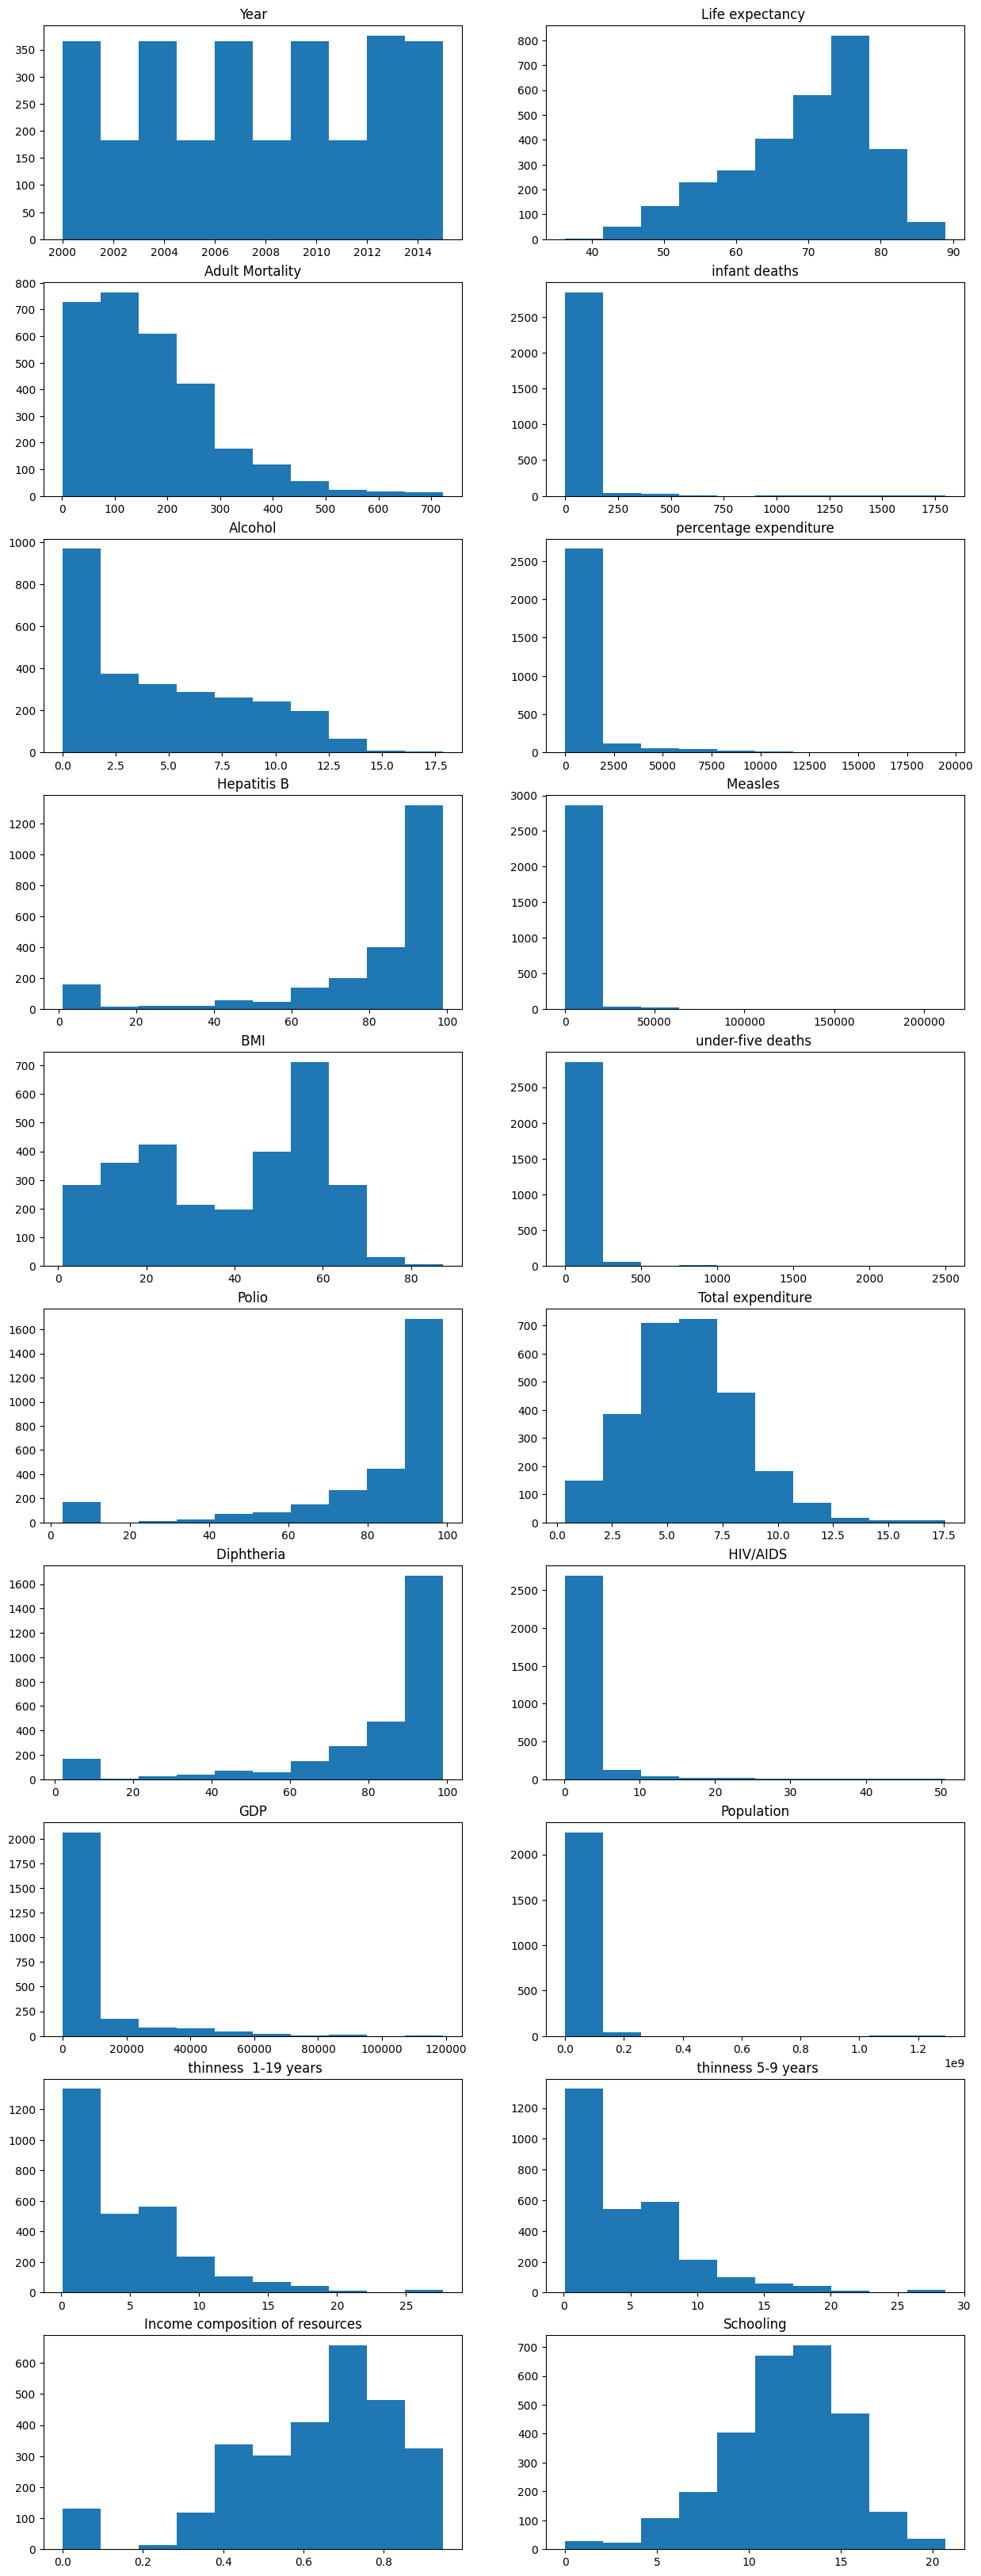

In [6]:
plt.figure(figsize=(15,75))

for i in range(len(num_cols)):
    plt.subplot(18,2,i+1)
    plt.hist(df[num_cols[i]])
    plt.title(num_cols[i])

plt.show()

In [7]:
df['Life expectancy ']= df['Life expectancy '].fillna(value=df['Life expectancy '].median())
df['Adult Mortality']=df['Adult Mortality'].fillna(value=df['Adult Mortality'].median())

In [8]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [9]:
Angola = df[df['Country'] =='Angola']

<Axes: xlabel='Year', ylabel='Life expectancy '>

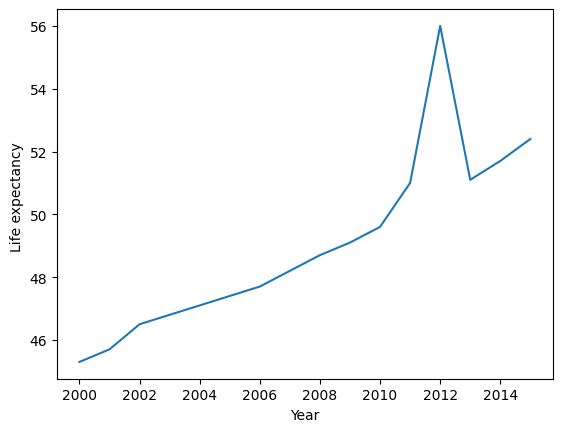

In [10]:
sns.lineplot(Angola , x='Year' , y='Life expectancy ')

In [11]:
Angola.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            1
percentage expenditure             0
Hepatitis B                        7
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  1
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [12]:
Angola = Angola.sort_values(by = 'Year')

In [13]:
na_list = df.columns[df.isna().any()].tolist()

In [14]:
Angola.loc[ :,na_list] = Angola.loc[:,na_list].interpolate()

In [15]:
Angola.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        7
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [16]:
df = df.sort_values(by = 'Year')

In [17]:
country_list = df['Country'].unique()

In [18]:
dfs = list()

In [19]:
for country in country_list:
    c = df[df['Country'] == country].sort_values(by = 'Year')
    c.loc[ :,na_list] = c.loc[:,na_list].interpolate()
    dfs.append(c)

In [20]:
ndf = pd.concat(dfs , axis=0)


<Axes: >

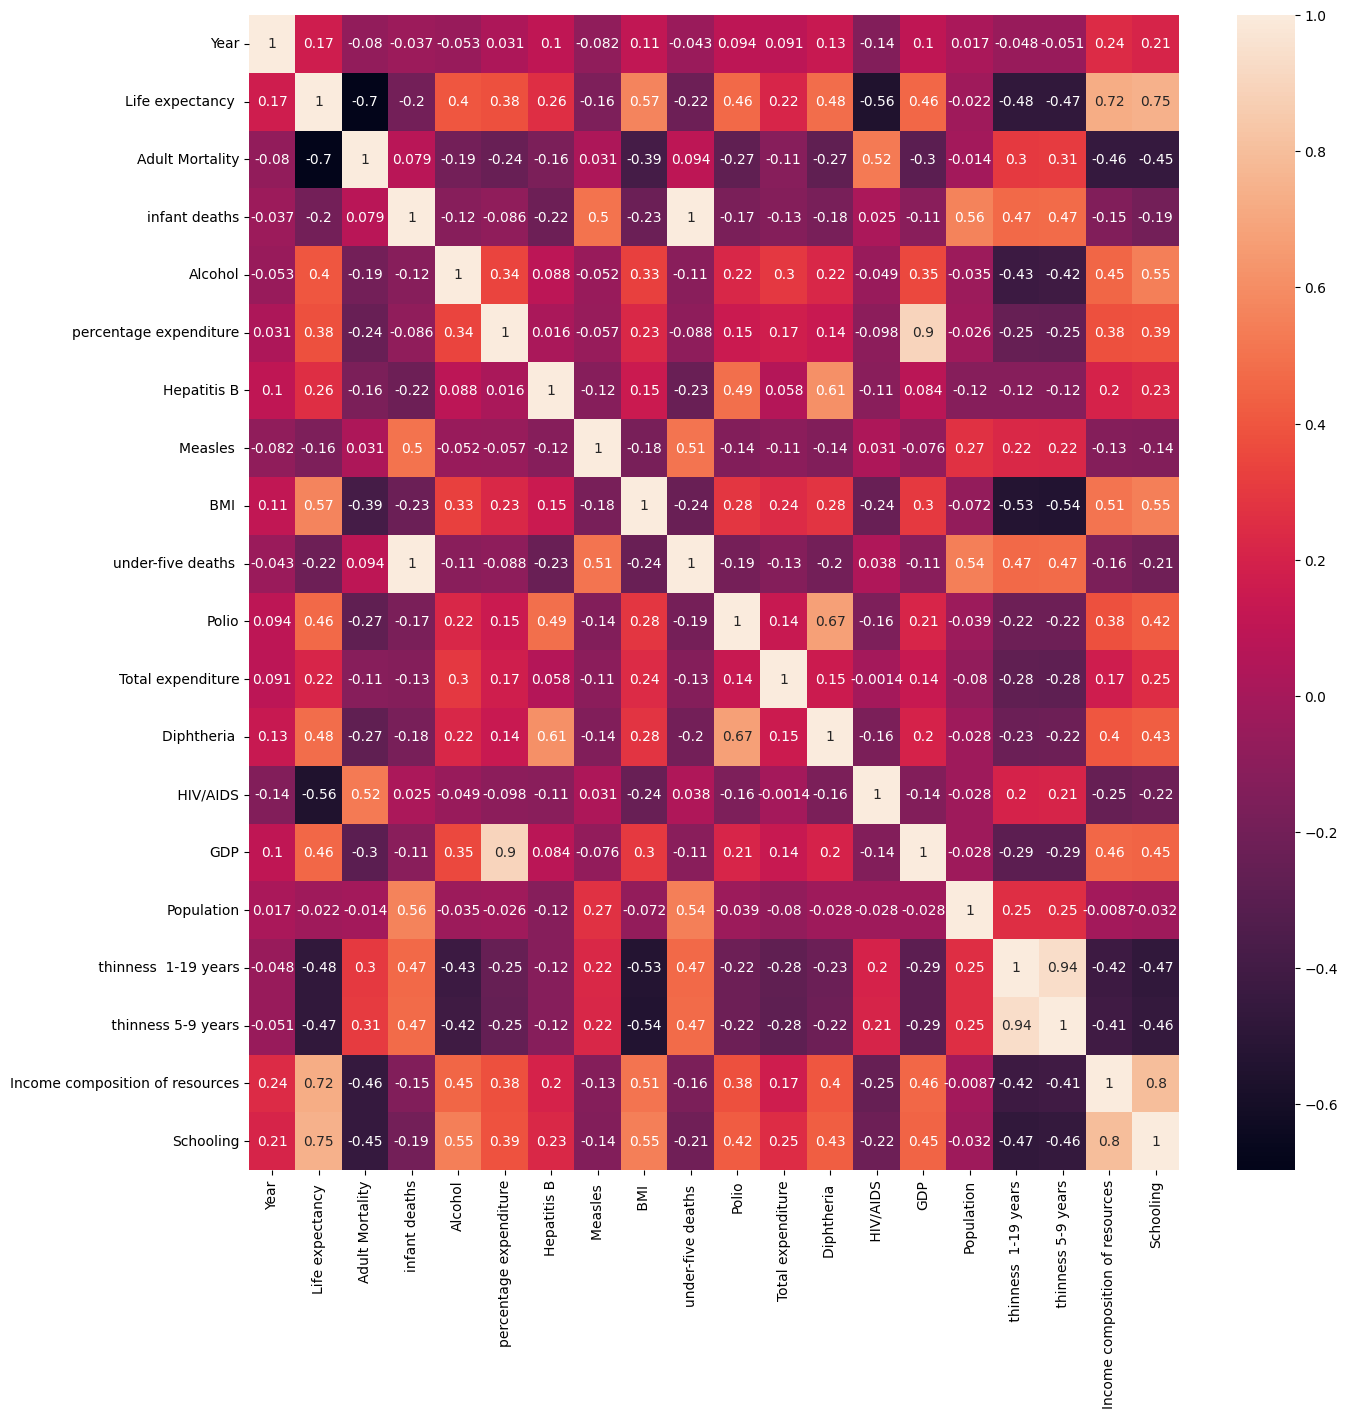

In [21]:
plt.figure(figsize=(15,15))

sns.heatmap(df[num_cols].corr() , annot=True)


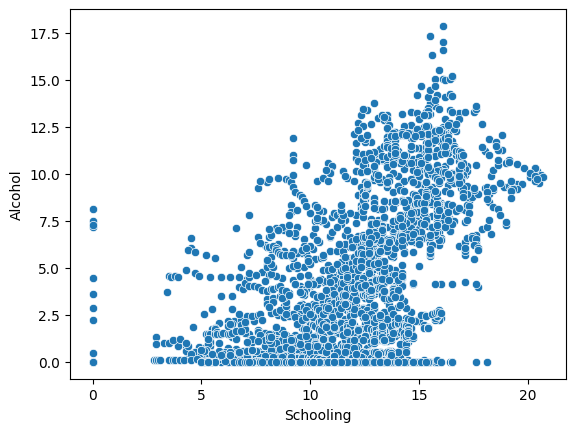

In [22]:
sns.scatterplot(x=df['Schooling'],y=df['Alcohol']);

In [23]:
df['Schooling_groups'] = pd.cut(df['Schooling'],4)

In [24]:
df['Schooling_groups'].value_counts()

Schooling_groups
(10.35, 15.525]     1635
(5.175, 10.35]       669
(15.525, 20.7]       379
(-0.0207, 5.175]      92
Name: count, dtype: int64

In [25]:
df.groupby('Schooling_groups')['Alcohol'].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_16248\2942059040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Schooling_groups')['Alcohol'].mean()


Schooling_groups
(-0.0207, 5.175]    1.918000
(5.175, 10.35]      2.133292
(10.35, 15.525]     4.566097
(15.525, 20.7]      9.176857
Name: Alcohol, dtype: float64

In [26]:
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=5.0:
            return 1.9
        elif 5.0 < sc <= 10.0:
            return 2.1
        elif 10.0 <sc<= 15.5:
            return 4.5
        elif 15.5 <sc <= 21.0:
            return 9.1
    else:
        return al
    
df['Alcohol_new'] =df[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_16248\2526769373.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  al=cols[0]
C:\Users\hp\AppData\Local\Temp\ipykernel_16248\2526769373.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sc=cols[1]


In [27]:
df['Alcohol_new'].isna().sum()

9

In [28]:
df[df['Alcohol_new'].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Schooling_groups,Alcohol_new
705,Democratic People's Republic of Korea,2015,Developing,76.0,139.0,6,NaN,0.0,96.0,0,...,96.0,0.1,NaN,NaN,4.9,4.9,NaN,NaN,NaN,NaN
721,Democratic Republic of the Congo,2015,Developing,59.8,258.0,236,NaN,0.0,81.0,5020,...,81.0,1.1,NaN,NaN,9.5,9.3,NaN,NaN,NaN,NaN
689,Czechia,2015,Developed,78.8,86.0,0,NaN,0.0,97.0,9,...,97.0,0.1,NaN,NaN,1.8,1.8,NaN,NaN,NaN,NaN
2087,Republic of Korea,2015,Developing,82.3,64.0,1,NaN,0.0,98.0,7,...,98.0,0.1,NaN,NaN,1.5,1.0,NaN,NaN,NaN,NaN
2377,Somalia,2015,Developing,55.0,312.0,50,NaN,0.0,42.0,7497,...,42.0,0.7,426.98537,NaN,6.6,6.4,NaN,NaN,NaN,NaN
2778,United Republic of Tanzania,2015,Developing,61.8,279.0,85,NaN,0.0,98.0,30,...,98.0,1.4,NaN,NaN,6.7,6.5,NaN,NaN,NaN,NaN
2794,United States of America,2015,Developed,79.3,13.0,23,NaN,0.0,92.0,188,...,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN,NaN,NaN
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN,NaN,NaN
2103,Republic of Moldova,2015,Developing,72.1,157.0,1,NaN,0.0,88.0,0,...,87.0,0.1,NaN,NaN,2.7,2.8,NaN,NaN,NaN,NaN


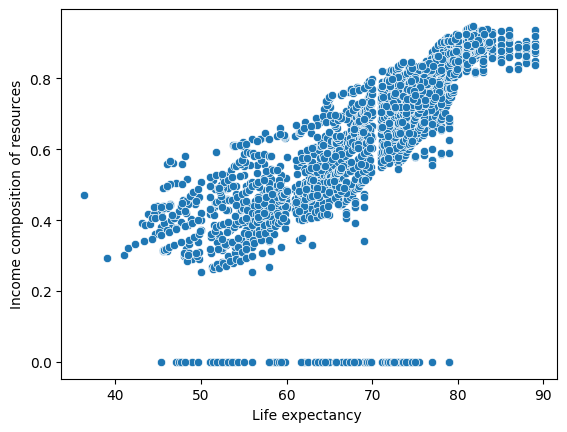

In [29]:
sns.scatterplot(x=df['Life expectancy '],y=df['Income composition of resources']);

In [30]:
df['leg'] = pd.cut(df['Life expectancy '] , 4)

In [31]:
df.groupby('leg')['Income composition of resources'].mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_16248\818998374.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('leg')['Income composition of resources'].mean()


leg
(36.247, 49.475]    0.374294
(49.475, 62.65]     0.414677
(62.65, 75.825]     0.631999
(75.825, 89.0]      0.831264
Name: Income composition of resources, dtype: float64

In [32]:
def impute_income(cols):
    al=cols[1]
    sc=cols[0]
    if pd.isnull(al):
        if sc<= 49.475:
            return 0.37
        elif 49.475 < sc <= 62.65:
            return 0.41
        elif 62.65 <sc<=75.825:
            return 0.63
        elif sc  > 75.825:
            return 0.83
    else:
        return al
    
df['income_new'] =df[['Life expectancy ','Income composition of resources']].apply(impute_income,axis=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_16248\4005895619.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  al=cols[1]
C:\Users\hp\AppData\Local\Temp\ipykernel_16248\4005895619.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sc=cols[0]


In [33]:
df['income_new'].isna().sum()

0

In [34]:
df.shape

(2938, 26)

In [35]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Schooling_groups,Alcohol_new,leg,income_new
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.000000,79.0,1483,...,547.358878,12222251.0,11.0,11.2,0.434,9.8,"(5.175, 10.35]",1.68,"(36.247, 49.475]",0.434
271,Belize,2000,Developing,68.3,196.0,0,4.79,219.023984,76.0,0,...,3364.423711,247315.0,3.8,3.7,0.668,11.7,"(10.35, 15.525]",4.79,"(62.65, 75.825]",0.668
1361,Kazakhstan,2000,Developing,63.9,292.0,9,6.00,112.541157,99.0,245,...,1229.958000,14883626.0,2.7,2.7,0.676,12.1,"(10.35, 15.525]",6.00,"(62.65, 75.825]",0.676
849,Equatorial Guinea,2000,Developing,52.7,336.0,3,4.46,14.954513,NaN,0,...,172.684910,614323.0,1.7,1.6,0.000,0.0,"(-0.0207, 5.175]",4.46,"(49.475, 62.65]",0.000
2424,South Sudan,2000,Developing,48.9,38.0,31,NaN,0.000000,NaN,0,...,NaN,67656.0,NaN,NaN,0.000,0.0,"(-0.0207, 5.175]",1.90,"(36.247, 49.475]",0.000


In [36]:
for variable in num_cols:
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0])),len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Year : 0 and 0.0
Number of outliers and percentage of it in Life expectancy  : 17 and 0.8555611474584801
Number of outliers and percentage of it in Adult Mortality : 86 and 4.3281328636134875
Number of outliers and percentage of it in infant deaths : 315 and 15.853044791142425
Number of outliers and percentage of it in Alcohol : 0 and 0.0
Number of outliers and percentage of it in percentage expenditure : 389 and 19.577252138902868
Number of outliers and percentage of it in Hepatitis B : 0 and 0.0
Number of outliers and percentage of it in Measles  : 542 and 27.27730246602919
Number of outliers and percentage of it in  BMI  : 0 and 0.0
Number of outliers and percentage of it in under-five deaths  : 394 and 19.828887770508302
Number of outliers and percentage of it in Polio : 0 and 0.0
Number of outliers and percentage of it in Total expenditure : 0 and 0.0
Number of outliers and percentage of it in Diphtheria  : 0 and 0.0
Number of outliers an

In [37]:
!pip install datasist

In [38]:
from datasist.structdata import detect_outliers

In [39]:
idx = detect_outliers(df , 0 , num_cols) 

In [40]:
len(idx)

1345

In [41]:
len(idx)/df.shape[0]

0.45779441797140913

In [44]:
df.shape

(2938, 26)